In [1]:
! pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta

random.seed(42)
np.random.seed(42)

h1b_counts = {
    "India": 313944,
    "China": 49917,
    "Mexico": 2444,
    "Canada": 4006,
    "Philippines": 2736,
    "Taiwan": 2676,
    "South Korea": 3928
}

non_usa_total = sum(h1b_counts.values())

countries = ["USA"]
country_probs = [0.60]

for country, count in h1b_counts.items():
    countries.append(country)
    prob = 0.40 * (count / non_usa_total)
    country_probs.append(prob)

genders = ["female", "male", "nonbinary"]
gender_probs = [0.49, 0.49, 0.02]

department_probs = {
    "Engineering": 0.30,
    "Product Management": 0.10,
    "Sales": 0.20,
    "Marketing": 0.10,
    "Customer Support": 0.10,
    "IT": 0.06,
    "Human Resources": 0.05,
    "Finance": 0.02,
    "Legal": 0.02,
    "Administrative": 0.04,
    "Executive Leadership": 0.01
}

country_locales = {
    "USA": "en_US",
    "India": "en_IN",
    "China": "zh_CN",
    "Mexico": "es_MX",
    "Canada": "en_CA",
    "Philippines": "en_PH",
    "Taiwan": "zh_TW",
    "South Korea": "ko_KR"
}

faker_instances = {loc: Faker(loc) for loc in set(country_locales.values())}
faker_us = Faker("en_US")  # For email, phone, SSN

roles_by_dept = {
    "Engineering": [("Software Engineer", (100000, 150000)), ("Senior Software Engineer", (170000, 220000))],
    "Product Management": [("Product Manager", (100000, 150000)), ("Senior Product Manager", (125000, 180000))],
    "Sales": [("Sales Executive", (100000, 180000)), ("Sales Manager", (160000, 280000))],
    "Marketing": [("Marketing Manager", (80000, 104000)), ("VP of Marketing", (200000, 300000))],
    "Customer Support": [("Support Specialist", (50000, 90000)), ("Customer Support Manager", (75000, 120000))],
    "IT": [("IT Analyst", (70000, 100000)), ("IT Manager", (95000, 135000))],
    "Human Resources": [("HR Manager", (90000, 130000)), ("Recruiter", (70000, 110000))],
    "Finance": [("Financial Analyst", (70000, 100000)), ("Controller", (120000, 170000))],
    "Legal": [("Legal Counsel", (150000, 250000)), ("Legal IT Support", (46500, 94000))],
    "Administrative": [("Admin Assistant", (35000, 60000)), ("IT Services Admin", (50000, 75000))],
    "Executive Leadership": [("VP", (200000, 400000)), ("CFO", (250000, 500000))]
}

def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

def generate_birthdate():
    today = datetime.today()
    start = today - timedelta(days=65*365)
    end = today - timedelta(days=20*365)
    return random_date(start, end).date()

def generate_hiredate(birthdate):
    earliest = max(datetime(2010, 1, 1), datetime.combine(birthdate, datetime.min.time()) + timedelta(days=365*20))
    return random_date(earliest, datetime.today()).date()

# Data generation
records = []
for i in range(10000):
    emp_id = 100000000 + i
    country = random.choices(countries, weights=country_probs)[0]
    locale = country_locales[country]
    fake = faker_instances[locale]

    name = fake.name()
    phone = faker_us.phone_number()
    email = faker_us.email()
    gender = random.choices(genders, weights=gender_probs)[0]
    birthdate = generate_birthdate()
    hiredate = generate_hiredate(birthdate)

    department = random.choices(list(department_probs.keys()), weights=list(department_probs.values()))[0]
    role, (low, high) = random.choice(roles_by_dept[department])
    salary = random.randint(low, high)
    ssid = faker_us.ssn()

    records.append({
        "employeeID": emp_id,
        "CountryOfBirth": country,
        "name": name,
        "phone": phone,
        "email": email,
        "gender": gender,
        "birthdate": birthdate,
        "hiredate": hiredate,
        "department": department,
        "role": role,
        "salary": salary,
        "SSID": ssid
    })

# Create DataFrame and save
emp_df = pd.DataFrame(records)
emp_df.to_csv("emp_df.csv", index=False)
print("emp_df created with", len(emp_df), "rows and saved to emp_df.csv")


emp_df created with 10000 rows and saved to emp_df.csv


In [3]:
emp_df.describe(include='all')

employeeID CountryOfBirth           name              phone  \
count   1.000000e+04          10000          10000              10000   
unique           NaN              8           9710              10000   
top              NaN            USA  Michael Davis  516.355.6554x4564   
freq             NaN           5918              4                  1   
mean    1.000050e+08            NaN            NaN                NaN   
std     2.886896e+03            NaN            NaN                NaN   
min     1.000000e+08            NaN            NaN                NaN   
25%     1.000025e+08            NaN            NaN                NaN   
50%     1.000050e+08            NaN            NaN                NaN   
75%     1.000075e+08            NaN            NaN                NaN   
max     1.000100e+08            NaN            NaN                NaN   

                     email gender   birthdate    hiredate   department  \
count                10000  10000       10000       10000        10000   
unique                9789      3        7522        4545           11   
top     jsmith@example.net   male  2004-04-09  2021-07-31  Engineering   
freq                     5   4931           5           9         2973   
mean                   NaN    NaN         NaN         NaN          NaN   
std                    NaN    NaN         NaN         NaN          NaN   
min                    NaN    NaN         NaN         NaN          NaN   
25%                    NaN    NaN         NaN         NaN          NaN   
50%                    NaN    NaN         NaN         NaN          NaN   
75%                    NaN    NaN         NaN         NaN          NaN   
max                    NaN    NaN         NaN         NaN          NaN   

                     role         salary         SSID  
count               10000   10000.000000        10000  
unique                 22            NaN        10000  
top     Software Engineer            NaN  087-05-2841  
freq                 1496            NaN            1  
mean                  NaN  145039.066300          NaN  
std                   NaN   58828.980705          NaN  
min                   NaN   35050.000000          NaN  
25%                   NaN  101410.250000          NaN  
50%                   NaN  133872.000000          NaN  
75%                   NaN  185234.000000          NaN  
max                   NaN  497252.000000          NaN

In [4]:
emp_df.head(10)

employeeID CountryOfBirth              name                  phone  \
0   100000000          India   Damyanti Khalsa             3013952218   
1   100000001          India       Aarnav Seth          (475)695-9909   
2   100000002            USA        John Tapia   001-807-222-3799x960   
3   100000003            USA      Kristen King           413.289.5853   
4   100000004            USA  Anthony Andersen  001-225-844-2257x0399   
5   100000005          India    Jonathan Patil        +1-392-653-0323   
6   100000006            USA     Marcus Morgan             5955862187   
7   100000007          India      Edhitha Gara    +1-765-368-2504x146   
8   100000008          India    Warjas Chauhan           867-865-7766   
9   100000009          India       Madhav Vora     768-706-4206x18071   

                       email     gender   birthdate    hiredate  \
0       hunttodd@example.net     female  1985-02-23  2015-06-30   
1         kyle67@example.net       male  1998-04-29  2018-09-01   
2        treeves@example.com     female  1978-04-24  2024-07-29   
3      vhumphrey@example.com     female  1961-01-20  2013-07-31   
4        emily60@example.com       male  1990-09-02  2012-12-12   
5         john50@example.net       male  1964-05-15  2020-04-21   
6      jasmine36@example.org       male  1992-12-01  2017-03-20   
7      lisazhang@example.org  nonbinary  1981-05-11  2012-04-07   
8  jonesmargaret@example.net     female  1992-05-06  2017-01-11   
9          esims@example.org       male  1982-06-08  2013-08-31   

           department                      role  salary         SSID  
0         Engineering         Software Engineer  144348  306-64-3855  
1         Engineering         Software Engineer  115247  561-79-9613  
2    Customer Support  Customer Support Manager   89446  126-09-8192  
3           Marketing           VP of Marketing  236421  790-49-4223  
4         Engineering         Software Engineer  123526  458-12-2079  
5               Sales             Sales Manager  170328  134-47-6730  
6    Customer Support        Support Specialist   64935  212-71-3762  
7  Product Management    Senior Product Manager  166660  154-68-3136  
8           Marketing         Marketing Manager   99960  241-49-5858  
9               Sales             Sales Manager  243886  391-61-7262

In [5]:
yearly_payroll = emp_df['salary'].sum()
print(f"The company pay in yearly payroll: ${yearly_payroll}")

The company pay in yearly payroll: $1450390663


<ipython-input-6-06f6cd47933f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_of_birth.index, y=count_of_birth.values, palette="viridis")


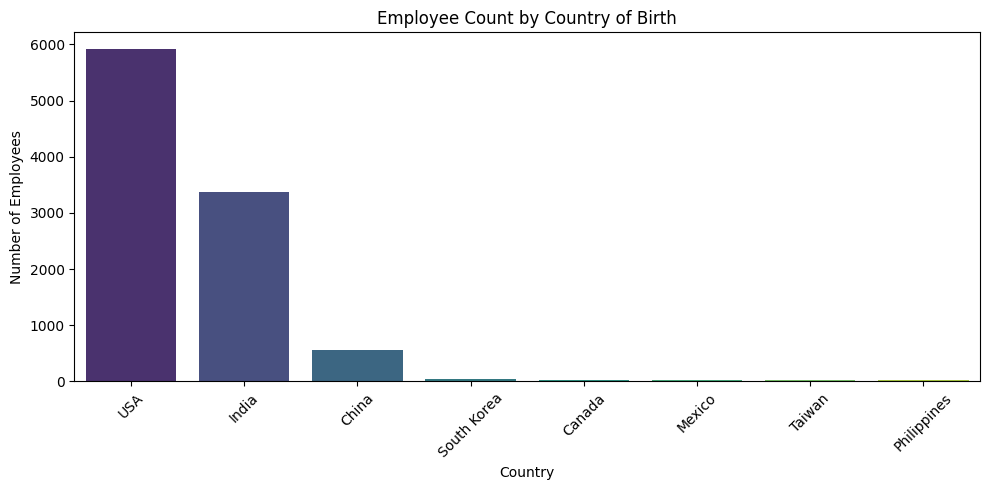

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

count_of_birth = emp_df['CountryOfBirth'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_of_birth.index, y=count_of_birth.values, palette="viridis")
plt.title('Employee Count by Country of Birth')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-8302cdaafd56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_of_employees.index, y=count_of_employees.values, palette="viridis")


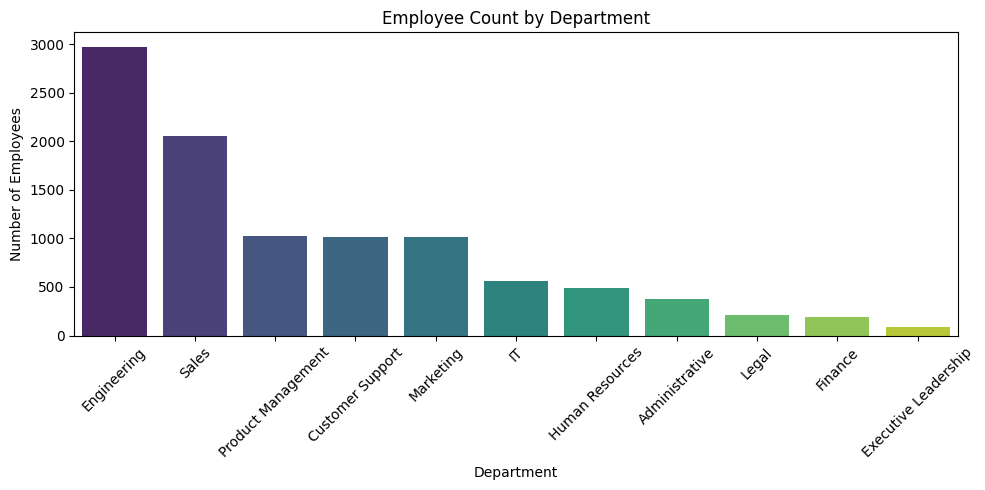

In [7]:
count_of_employees = emp_df['department'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=count_of_employees.index, y=count_of_employees.values, palette="viridis")
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

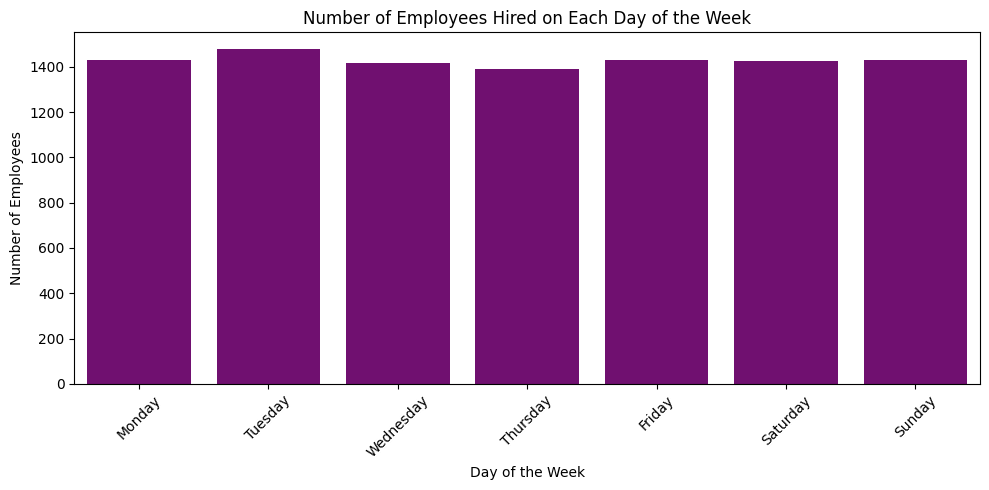

In [8]:

emp_df['hiredate'] = pd.to_datetime(emp_df['hiredate'])

emp_df['hire_day'] = emp_df['hiredate'].dt.day_name()
hire_day_counts = emp_df['hire_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hire_day_counts.index, y=hire_day_counts.values, color="purple")
plt.title('Number of Employees Hired on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

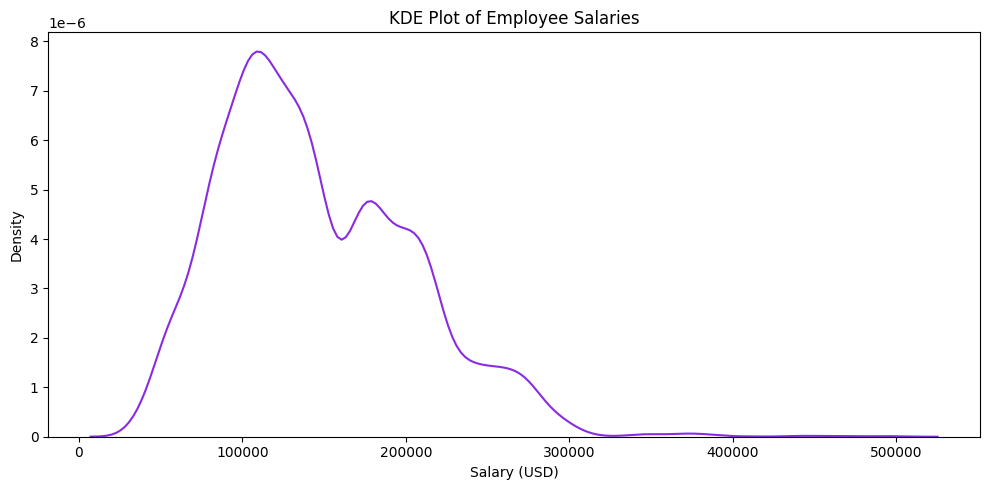

In [9]:
emp_df['salary'] = pd.to_numeric(emp_df['salary'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.kdeplot(data=emp_df, x="salary", color="#8A2BE2")
plt.title("KDE Plot of Employee Salaries")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

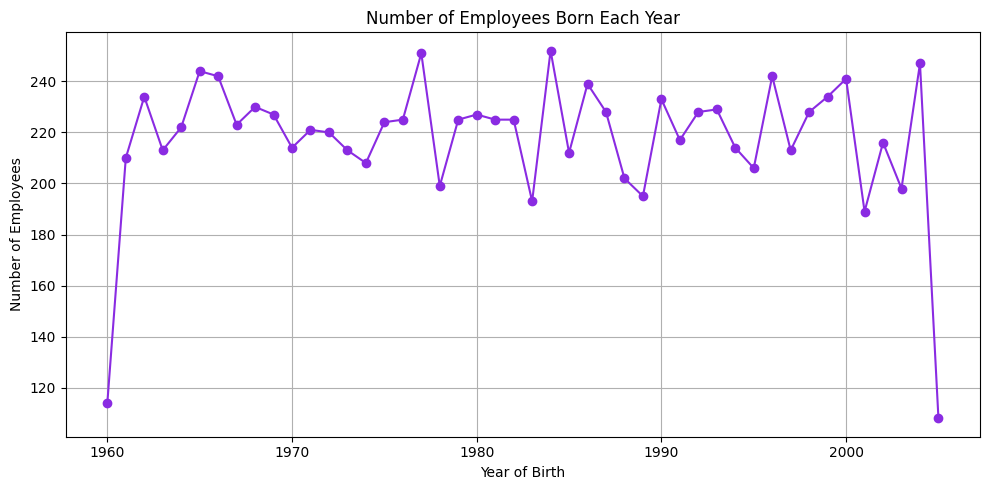

In [10]:
emp_df['birthdate'] = pd.to_datetime(emp_df['birthdate'])
emp_df['birth_year'] = emp_df['birthdate'].dt.year

birth_year_counts = emp_df['birth_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(birth_year_counts.index, birth_year_counts.values, marker='o', color="#8A2BE2")
plt.title("Number of Employees Born Each Year")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Employees")
plt.grid(True)
plt.tight_layout()
plt.show()

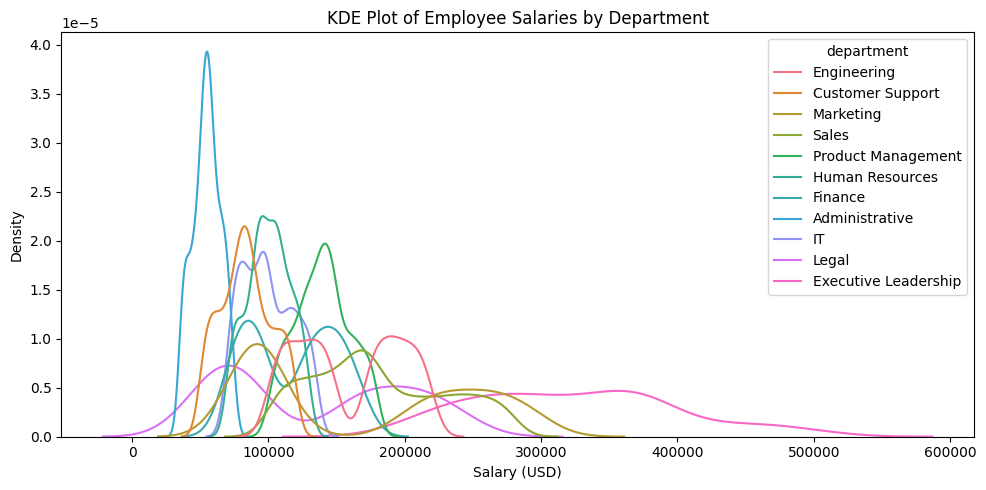

In [11]:
emp_df['salary'] = pd.to_numeric(emp_df['salary'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.kdeplot(data=emp_df, x="salary", hue="department", common_norm=False)
plt.title("KDE Plot of Employee Salaries by Department")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [12]:
print(emp_df.columns)


Index(['employeeID', 'CountryOfBirth', 'name', 'phone', 'email', 'gender',
       'birthdate', 'hiredate', 'department', 'role', 'salary', 'SSID',
       'hire_day', 'birth_year'],
      dtype='object')


In [13]:
import pandas as pd
import numpy as np

from datetime import datetime
current_year = datetime.now().year

emp_df['age'] = current_year - emp_df['birth_year']


weights = np.where((emp_df['age'] >= 40) & (emp_df['age'] <= 49), 3, 1)

smpl_df = emp_df.sample(n=500, weights=weights, random_state=42)


In [14]:
print(smpl_df.describe(include='all'))

          employeeID CountryOfBirth          name       phone  \
count   5.000000e+02            500           500         500   
unique           NaN              5           500         500   
top              NaN            USA  Robert Clark  2016218569   
freq             NaN            304             1           1   
mean    1.000050e+08            NaN           NaN         NaN   
min     1.000000e+08            NaN           NaN         NaN   
25%     1.000025e+08            NaN           NaN         NaN   
50%     1.000052e+08            NaN           NaN         NaN   
75%     1.000076e+08            NaN           NaN         NaN   
max     1.000099e+08            NaN           NaN         NaN   
std     2.971157e+03            NaN           NaN         NaN   

                            email gender                   birthdate  \
count                         500    500                         500   
unique                        499      3                         NaN   
top

In [15]:
print(smpl_df.head(10))

      employeeID CountryOfBirth             name                   phone  \
3780   100003780          China              汪丽娟   001-461-905-0672x5132   
9490   100009490            USA    Michael Dixon  001-349-205-8538x89290   
7355   100007355            USA     William Wong            407-910-3115   
5999   100005999            USA      Kevin Ramos    +1-685-574-1386x7825   
1574   100001574            USA  Jose Montgomery    001-559-998-5576x980   
594    100000594            USA    Nathan Palmer   001-743-692-8840x9935   
8637   100008637          India       Zansi Nagi      (664)201-0064x6894   
6024   100006024            USA      Michael May           (373)292-7040   
7104   100007104            USA  William Goodman   +1-354-216-2091x73041   
215    100000215          China               江佳            532.779.4225   

                         email     gender  birthdate   hiredate  \
3780     xhumphrey@example.com     female 1971-02-14 2025-03-18   
9490       hmartin@example.or

In [16]:
import numpy as np

np.random.seed(42)

salary_std = emp_df['salary'].std()
noise = np.random.normal(loc=0, scale=0.1 * salary_std, size=emp_df.shape[0])

emp_df['perturbed_salary'] = emp_df['salary'] + noise

prtrb_df = emp_df.copy()
prtrb_df['salary'] = emp_df['perturbed_salary']
prtrb_df.drop(columns=['perturbed_salary'], inplace=True)

std_dev = emp_df['salary'].std() * 0.1


In [17]:
print(prtrb_df.describe(include='all'))

          employeeID CountryOfBirth           name              phone  \
count   1.000000e+04          10000          10000              10000   
unique           NaN              8           9710              10000   
top              NaN            USA  Michael Davis  516.355.6554x4564   
freq             NaN           5918              4                  1   
mean    1.000050e+08            NaN            NaN                NaN   
min     1.000000e+08            NaN            NaN                NaN   
25%     1.000025e+08            NaN            NaN                NaN   
50%     1.000050e+08            NaN            NaN                NaN   
75%     1.000075e+08            NaN            NaN                NaN   
max     1.000100e+08            NaN            NaN                NaN   
std     2.886896e+03            NaN            NaN                NaN   

                     email gender                   birthdate  \
count                10000  10000                       10

In [18]:
print(prtrb_df.head(10))

   employeeID CountryOfBirth              name                  phone  \
0   100000000          India   Damyanti Khalsa             3013952218   
1   100000001          India       Aarnav Seth          (475)695-9909   
2   100000002            USA        John Tapia   001-807-222-3799x960   
3   100000003            USA      Kristen King           413.289.5853   
4   100000004            USA  Anthony Andersen  001-225-844-2257x0399   
5   100000005          India    Jonathan Patil        +1-392-653-0323   
6   100000006            USA     Marcus Morgan             5955862187   
7   100000007          India      Edhitha Gara    +1-765-368-2504x146   
8   100000008          India    Warjas Chauhan           867-865-7766   
9   100000009          India       Madhav Vora     768-706-4206x18071   

                       email     gender  birthdate   hiredate  \
0       hunttodd@example.net     female 1985-02-23 2015-06-30   
1         kyle67@example.net       male 1998-04-29 2018-09-01   
2

In [19]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=49cc77febe04d0c382212d294cf1c37ca7c5d9f5ef95aec0cb44eb24ba215e14
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(emp_df, title="Employee Data Profile", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:01<00:00, 12.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]